In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [131]:
import pandas as pd
df_times=pd.read_csv('movies_shutter/times_photocell_1hz.txt',header=None,names=['n','start','end','diff','t'])

In [132]:
diffs=df_times.t.to_numpy()[1:-1]-df_times.t.to_numpy()[:-2]

In [133]:
(dur,rat)=np.mean(diffs),1./np.mean(diffs)
print( dur, rat)

0.00021526339922126004 4645.471564685935


In [134]:
fil=open('movies_shutter/movies/photocell_1hz.text','rb')
wid=1024
bits=np.fromfile(fil,dtype='uint8')
fil.close()
bits=np.reshape( bits, (np.shape(bits)[0]//wid, 1, wid) )

In [135]:
np.shape(bits)

(94000, 1, 1024)

In [136]:
pwd

'/home/dcoates/projects/grab'

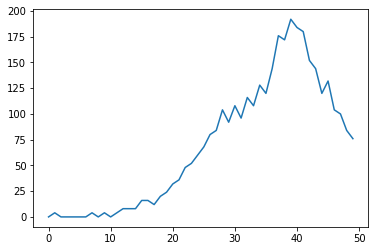

In [154]:
plt.plot(bits[5100,0,0:50])

In [164]:
dur

0.00021526339922126004

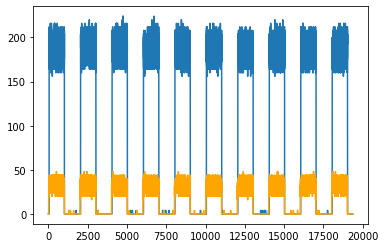

In [167]:
nsamples=90000
xr=np.arange(nsamples)*dur*1000

plt.plot(xr,bits[4000:4000+nsamples,:,40])
plt.plot(xr,bits[4000:4000+nsamples,:,-1],color='orange')

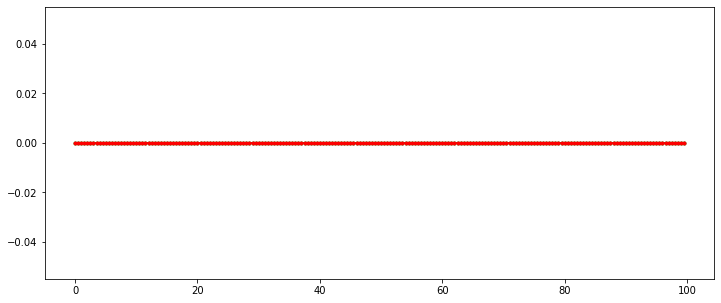

In [138]:
plt.figure(figsize=(12,5))
numsamp=100
#xt=np.arrage(3600,3750)
xr=np.arange(200)*0.5
plt.plot(xr, bits[3600:3800,0,-200],'g.-' )
plt.plot(xr, bits[3600:3800,0,0],'r.-' )
#plt.xlim(3600,3750)
#plt.axis("off")

#plt.savefig('time_series.pdf', bbox_inches='tight')

In [168]:
bits1=bits[:,0,40]
bits_shutter=bits[:,0,-1]
deriv=np.array( bits1[1:],dtype='int16')-bits1[:-1]

(0, 50)

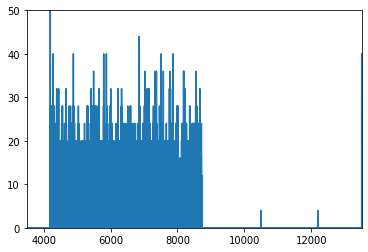

In [174]:
plt.plot(deriv)
plt.xlim(3500,13500)
plt.ylim(0,50)

In [176]:
bigs=np.where( deriv>20)[0]

In [177]:
last=0
goods=[]
for n in bigs:
    if (n-last)>6000:
        goods.append( n )
        last=n

In [178]:
goods=np.array(goods)

In [179]:
goods[1:]-goods[:-1]

array([7495, 9301, 9300, 9300, 9300, 9300, 9300, 9300, 9301])

In [180]:
9300*dur #*0.0005

2.0019496127577185

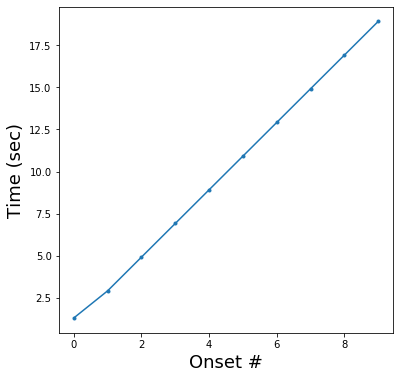

In [181]:
plt.figure(figsize=(6,6))
plt.plot( goods*dur, '.-')
plt.xlabel('Onset #', size=18)
plt.ylabel('Time (sec)', size=18)
plt.savefig('time_vs_onset.pdf', bbox_inches='tight')

In [182]:
len(goods)

10

In [183]:
pwd

'/home/dcoates/projects/grab'

In [122]:
plt.figure( figsize=(8,6))

for which_sample in range(len(goods)-1):
    #which_first=40
    #nsamps=1100
    
    which_first=10
    nsamps=8000
    xr=np.arange(nsamps)*dur
    plt.plot(xr, bits1[goods[which_sample]-which_first:goods[which_sample]-which_first+nsamps], '.-',color='slateblue')
  
    plt.text(0,140, '%02d'%which_sample,size=20,color='crimson')
    plt.ylabel('Pixel intensity', size=18)
    plt.xlabel('Time (sec)', size=18)
    plt.ylim(0,155)
    
    plt.savefig('animz/im%03d.png'%which_sample)

    plt.clf()

<Figure size 576x432 with 0 Axes>

In [192]:
plt.figure( figsize=(8,6))

for which_sample in range(len(goods)-1):
    which_first=int(rat*0.100)
    nsamps=int( rat*0.2 )
    
    #which_first=10
    #nsamps=260
    xr=np.arange(nsamps)*dur
    plt.plot(xr, bits1[goods[which_sample]-which_first:goods[which_sample]-which_first+nsamps], '.-',color='slateblue')

    plt.plot(xr,1* bits_shutter[goods[which_sample]-which_first:goods[which_sample]-which_first+nsamps], '.-',color='orange')

    
    plt.text(0,140, '%02d'%which_sample,size=20,color='crimson')
    plt.ylabel('Pixel intensity', size=18)
    plt.xlabel('Time (sec)', size=18)
    plt.ylim(0,155)
    
    plt.savefig('anim/im%03d.png'%which_sample)

    plt.clf()

<Figure size 576x432 with 0 Axes>

In [185]:
%pwd

'/home/dcoates/projects/grab'

In [14]:
from numpy import fft

[]

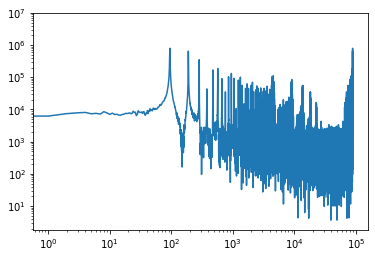

In [20]:
plt.plot( np.abs( fft.fft(bits[:,0,0]) ))
plt.loglog()

In [67]:
pix1=( bits[:,0,1024])

In [78]:
rises=np.where( np.all( (pix1[1:]>70, pix1[:-1]<70),axis=0) )[0]

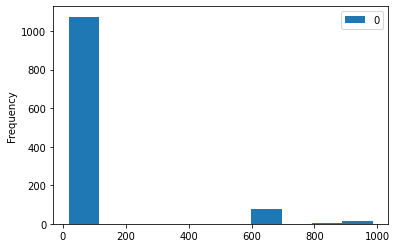

In [90]:
pd.DataFrame( ( rises[1:]-rises[:-1] )).plot(kind='hist')

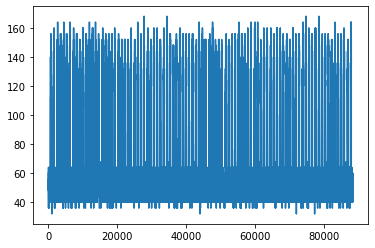

In [76]:
plt.plot( pix1 )

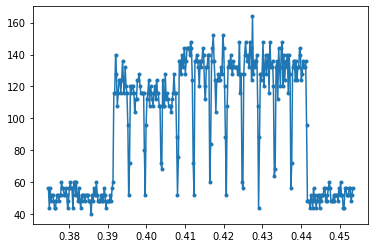

In [40]:
x1=150;x2=500;
plt.plot(df_times.t[x1:x2], bits[x1:x2,0,1024],'.-' )

In [35]:
df_times.t

0       0.340919
1       0.341137
2       0.341451
3       0.341624
4       0.341817
          ...   
8843    2.334940
8844    2.335180
8845    2.335390
8846    2.335610
8847    2.347710
Name: t, Length: 8848, dtype: float64